# Dayananda B N, 201EC219

### Department of Electronics & Communication Engineering
#### National Institute of Technology Karnataka 
#### Surathkal, Mangalore-575025(Karnataka), India
#### EC460- Neural Networks and Deep Learning
#### Assignment 1(b): Linear Regression

## Assignment 1(b): Linear Regression

###  Q.1. The neural network shown in Fig.1 has the following hyper parameters and input: Choose random weights and bias of the neuron and learning rate =0.01 and inputs to the neuron and target values are as follows.

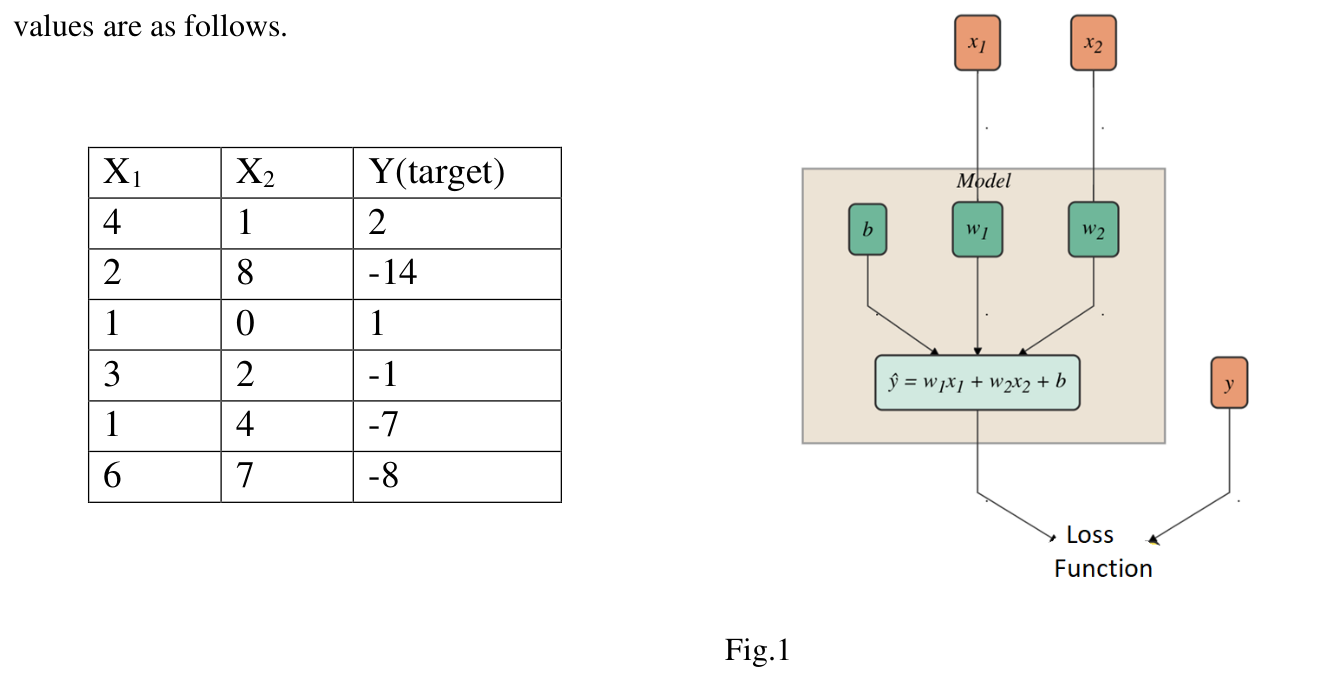

### (a).Write a python code for predicted the output of neural network for given set of inputs using Stochastic Gradient Descent algorithm for the loss functions: ((i) Mean Square Error (ii) Squared Epsilon Hinge Loss (b) Plot loss curve for 100 epochs (c) Calculate MAE and RMSE of the model.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# creating Dictionary 
d = {'X1': pd.Series([4,2,1,3,1,6]),
     'X2': pd.Series([1,8,0,2,4,7]),
     'Y':  pd.Series([2,-14,1,-1,-7,-8])}
df = pd.DataFrame(d)
df

,X1,X2,Y
0,4,1,2
1,2,8,-14
2,1,0,1
3,3,2,-1
4,1,4,-7
5,6,7,-8


In [4]:
x_data = df.iloc[:,0:2]
x_data

,X1,X2
0,4,1
1,2,8
2,1,0
3,3,2
4,1,4
5,6,7


In [5]:
y_data = df.iloc[:,2:3]
y_data

,Y
0,2
1,-14
2,1
3,-1
4,-7
5,-8


In [6]:
x_data.describe()

,X1,X2
count,6.000000,6.000000
mean,2.833333,3.666667
std,1.940790,3.265986
min,1.000000,0.000000
25%,1.250000,1.250000
50%,2.500000,3.000000
75%,3.750000,6.250000
max,6.000000,8.000000


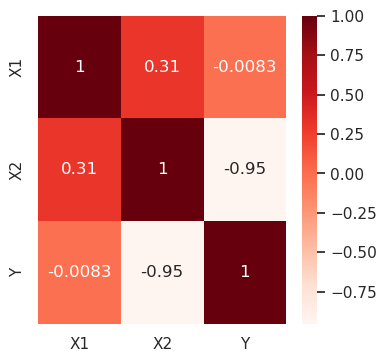

In [7]:
cor = df.corr()
plt.figure(figsize = (4,4))
sns.heatmap(cor,annot = True,cmap = plt.cm.Reds)
plt.show()

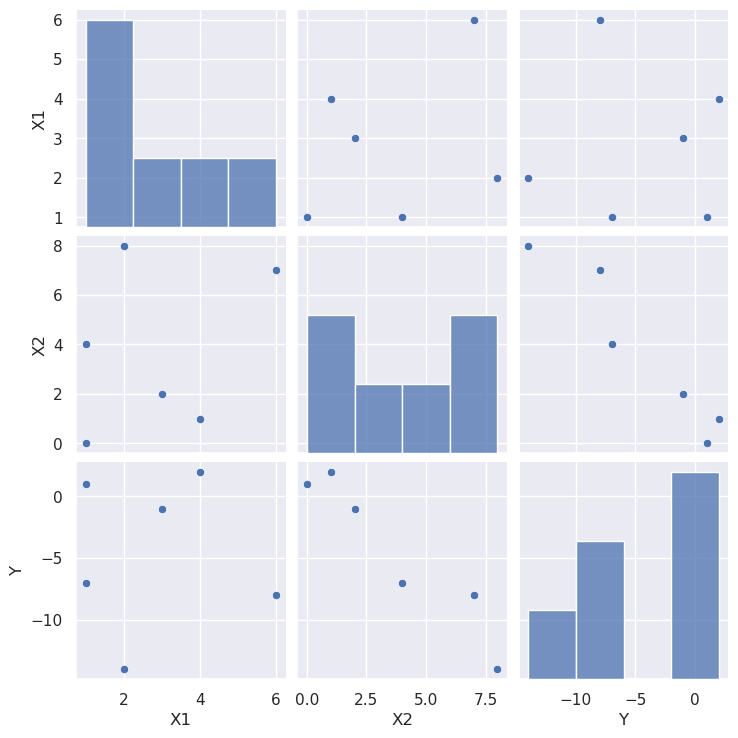

In [8]:
sns.pairplot(df)

In [9]:
print(x_data.shape,y_data.shape)

(6, 2) (6, 1)


### Standardization (Z-score normalization):

#### Using existing libraries

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_norm = sc.fit_transform(x_data)
y_norm = sc.fit_transform(y_data)

In [11]:
print(x_norm.shape,y_norm.shape)

(6, 2) (6, 1)


In [12]:
x_norm

array([[ 0.65850461, -0.89442719],
       [-0.47036043,  1.45344419],
       [-1.03479296, -1.22983739],
       [ 0.09407209, -0.55901699],
       [-1.03479296,  0.1118034 ],
       [ 1.78736965,  1.11803399]])

In [13]:
df1 = pd.DataFrame(x_norm,columns = ['X1','X2'] )

In [14]:
df1

,X1,X2
0,0.658505,-0.894427
1,-0.470360,1.453444
2,-1.034793,-1.229837
3,0.094072,-0.559017
4,-1.034793,0.111803
5,1.787370,1.118034


In [15]:
y_norm

array([[ 1.14458618],
       [-1.67285672],
       [ 0.968496  ],
       [ 0.61631563],
       [-0.44022545],
       [-0.61631563]])

In [16]:
df2 = pd.DataFrame(y_norm, columns = ['Y'])

In [17]:
df2

,Y
0,1.144586
1,-1.672857
2,0.968496
3,0.616316
4,-0.440225
5,-0.616316


#### From Scratch code for Std normalization

$                 
                      X_{norm} = \frac{X - \mu}{\sigma}
$

In [18]:
x_norm1 = (x_data - x_data.mean())/(x_data.std())

In [19]:
x_norm1

,X1,X2
0,0.601130,-0.816497
1,-0.429378,1.326807
2,-0.944632,-1.122683
3,0.085876,-0.510310
4,-0.944632,0.102062
5,1.631638,1.020621


In [20]:
comparision = pd.concat([df1,x_norm1],axis = 1)

In [21]:
comparision

,X1,X2,X1,X2
0,0.658505,-0.894427,0.601130,-0.816497
1,-0.470360,1.453444,-0.429378,1.326807
2,-1.034793,-1.229837,-0.944632,-1.122683
3,0.094072,-0.559017,0.085876,-0.510310
4,-1.034793,0.111803,-0.944632,0.102062
5,1.787370,1.118034,1.631638,1.020621


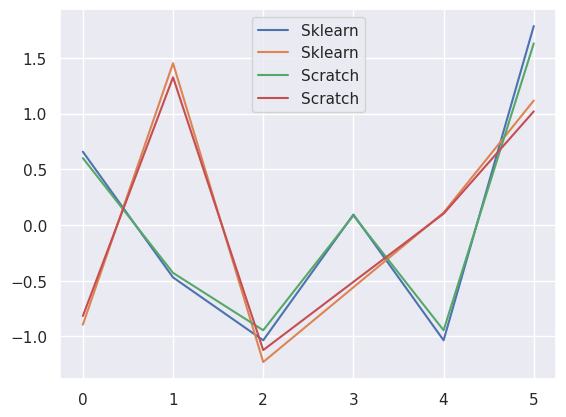

In [22]:
plt.plot(df1,label = 'Sklearn')
plt.plot(x_norm1,label = 'Scratch')
plt.legend()
plt.show()

In [23]:
y_norm1 = (y_data - y_data.mean())/(y_data.std())

In [24]:
y_norm1

,Y
0,1.044859
1,-1.527102
2,0.884112
3,0.562617
4,-0.401869
5,-0.562617


In [25]:
comparision1 = pd.concat([df2,y_norm1],axis = 1)

In [26]:
comparision1

,Y,Y
0,1.144586,1.044859
1,-1.672857,-1.527102
2,0.968496,0.884112
3,0.616316,0.562617
4,-0.440225,-0.401869
5,-0.616316,-0.562617


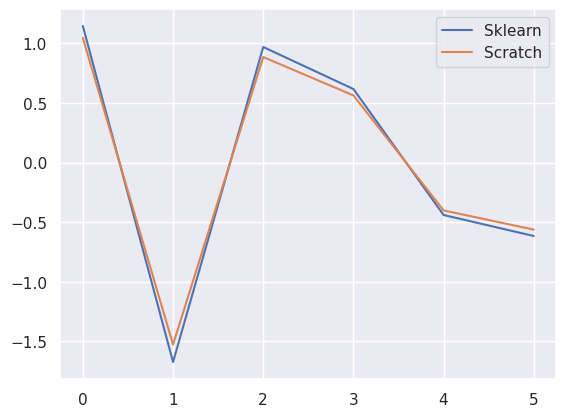

In [27]:
plt.plot(df2,label = 'Sklearn')
plt.plot(y_norm1,label = 'Scratch')
plt.legend()
plt.show()

### Min-Max Scaling (Normalization):

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc1 = MinMaxScaler()
x_norm_ = sc1.fit_transform(x_data)

In [29]:
sc2 = MinMaxScaler()
y_norm_ = sc2.fit_transform(y_data)

In [30]:
print(x_norm_,y_norm_)

[[0.6   0.125]
 [0.2   1.   ]
 [0.    0.   ]
 [0.4   0.25 ]
 [0.    0.5  ]
 [1.    0.875]] [[1.    ]
 [0.    ]
 [0.9375]
 [0.8125]
 [0.4375]
 [0.375 ]]


In [31]:
df3 = pd.DataFrame(x_norm_,columns = ['X1','x2'])
df3

,X1,x2
0,0.6,0.125
1,0.2,1.000
2,0.0,0.000
3,0.4,0.250
4,0.0,0.500
5,1.0,0.875


In [32]:
df4 = pd.DataFrame(y_norm_,columns = ['Y1'])
df4

,Y1
0,1.0000
1,0.0000
2,0.9375
3,0.8125
4,0.4375
5,0.3750


#### From Scratch code for Min-Max Scaling (Normalization):

$
  X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
$

In [33]:
x_norm2 = (x_data - x_data.min())/(x_data.max() - x_data.min())
x_norm2

,X1,X2
0,0.6,0.125
1,0.2,1.000
2,0.0,0.000
3,0.4,0.250
4,0.0,0.500
5,1.0,0.875


In [34]:
y_norm2 = (y_data - y_data.min())/(y_data.max() - y_data.min())
y_norm2

,Y
0,1.0000
1,0.0000
2,0.9375
3,0.8125
4,0.4375
5,0.3750


In [35]:
comparision2 = pd.concat([df3,x_norm2],axis = 1)
comparision2

,X1,x2,X1,X2
0,0.6,0.125,0.6,0.125
1,0.2,1.000,0.2,1.000
2,0.0,0.000,0.0,0.000
3,0.4,0.250,0.4,0.250
4,0.0,0.500,0.0,0.500
5,1.0,0.875,1.0,0.875


In [36]:
comparision3 = pd.concat([df4,y_norm2],axis = 1)
comparision3

,Y1,Y
0,1.0000,1.0000
1,0.0000,0.0000
2,0.9375,0.9375
3,0.8125,0.8125
4,0.4375,0.4375
5,0.3750,0.3750


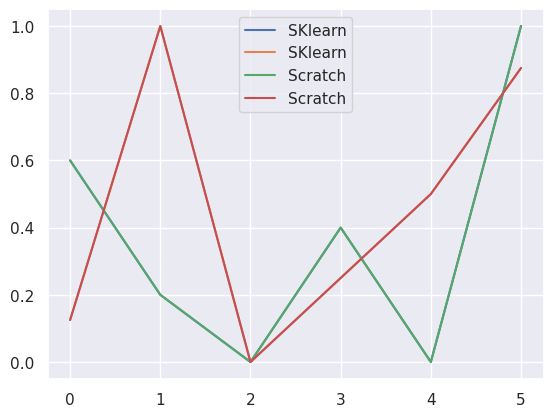

In [37]:
plt.plot(df3,label = 'SKlearn')
plt.plot(x_norm2,label = 'Scratch')
plt.legend()

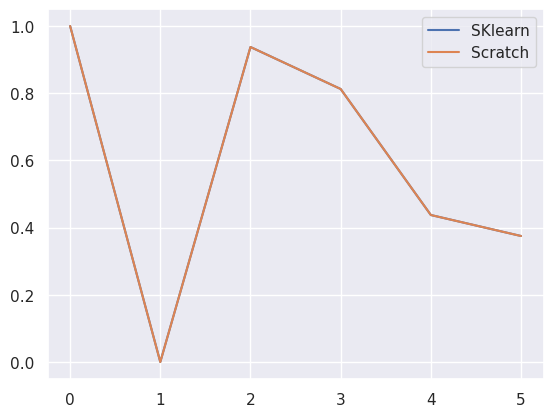

In [38]:
plt.plot(df4,label = 'SKlearn')
plt.plot(y_norm2,label = 'Scratch')
plt.legend()

## for simplicity let's continue with x_norm and y_norm using std method using libraries(not from scratch code)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm,y_norm,test_size=0.2,random_state=42)

In [40]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4, 2) (2, 2) (4, 1) (2, 1)


### Stochastic Gradient Descent algorithm (from LIbraries)

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [42]:
model.coef_

array([[ 0.31197738, -1.04999897]])

In [43]:
model.intercept_

array([2.77555756e-17])

In [44]:
y_pred = model.predict(x_test)

In [45]:
y_pred

array([[ 1.14458618],
       [-1.67285672]])

### Stochastic Gradient Descent algorithm (from Scratch code)

### (i) Mean Square Error

In [46]:
# cost function implimentation
def cal_cost(theta,x,y):
    y_pred = np.dot(x,theta)
    J = (1/len(y))*np.sum((y_pred - y)**2)
    
    return J

In [47]:
print(x_train.shape[0],x_train.shape[1])

4 2


In [48]:
m = len(y_train)
m

4

In [49]:
l = np.random.randint(m)
# reshaping the x_train 
x_inner = x_train[l].reshape(1,x_train.shape[1])

In [50]:
x_inner

array([[-1.03479296, -1.22983739]])

In [51]:
# reshaping the y_train
y_inner = y_train[l].reshape(1,1)

In [52]:
y_inner

array([[0.968496]])

In [53]:
def stochastic_gradient_descent(x,y,theta,lr,epochs):
    m = len(y_train)
    theta_history = np.zeros((epochs,3))
    cost_history = np.zeros((epochs))
    for i in range(epochs):
        cost_per_iteration = 0.0
        for j in range(m):

            l = int(np.random.randint(m))
            x_in = x_train[l].reshape(1,-1)
            x_inner = np.c_[np.ones((len(x_in),1)),x_in]
            y_inner = y_train[l].reshape(1,1)
            # Forward Propagation
            y_pred = np.dot(x_inner,theta)
            # computing the cost value
            cost_per_iteration = cost_per_iteration + cal_cost(theta,x_inner,y_inner)
            # backpropagation
            d_theta = (2/len(y_train))*(x_inner.T.dot((y_pred - y_inner)))
            # weight update
            theta = theta - (lr*d_theta)
        cost_history[i] = cost_per_iteration
    return theta,cost_history,theta_history

In [54]:
x_inner

array([[-1.03479296, -1.22983739]])

In [55]:
x_in = x_train[l].reshape(1,-1)
x_in.shape


(1, 2)

In [56]:
x_inner = np.c_[np.ones((len(x_in),1)),x_in]

In [57]:
x_inner.shape

(1, 3)

In [58]:
len(x_train)
(len(x_train),1)
np.ones((len(x_train),1))
np.c_[np.ones((len(x_train),1))]
x_b = np.c_[np.ones((len(x_train),1)),x_train]
x_b

array([[ 1.        ,  1.78736965,  1.11803399],
       [ 1.        , -1.03479296, -1.22983739],
       [ 1.        , -1.03479296,  0.1118034 ],
       [ 1.        ,  0.09407209, -0.55901699]])

In [59]:
x_train.shape

(4, 2)

In [60]:
x_b.shape

(4, 3)

In [61]:
# Calling Stochastic gradient descent 
import time
lr  = 0.01
epochs = 1000
theta = np.random.randn(3,1)
print("Initial values of weights")
print(theta)

x_b = np.c_[np.ones((len(x_train),1)),x_train]

# Calling SGD
t20 = time.time()
theta,cost_history,theta_history = stochastic_gradient_descent(x_b,y_train,theta,lr,epochs)
t21 = time.time()
time_SGD = t21 - t20
print("Processing Time of SGD Algorithm")
print(time_SGD)
print(theta)


x_b1 = np.c_[np.ones((len(x_test),1)),x_test]
# Predict value by NN
y_pred = np.dot(x_b1,theta)
print("Optimal value of weights")
print('{:<10}{:.3}'.format('Theta0',theta[0][0]))
print('{:<10}{:.3}'.format('Theta1',theta[1][0]))
print('{:<10}{:.3}'.format('Theta2',theta[2][0]))
print("Minimum value of cost function")
print('{:<10}{:.3}'.format('Cost/MSE',cost_history[-1]))

# print(y_predicted)
y_true = np.c_[y_pred,y_test]
print(y_true)

Initial values of weights
[[ 0.62304967]
 [-0.4564933 ]
 [-0.9901594 ]]
Processing Time of SGD Algorithm
0.16176414489746094
[[ 5.59502015e-04]
 [ 3.08300703e-01]
 [-1.04439525e+00]]
Optimal value of weights
Theta0    0.00056
Theta1    0.308
Theta2    -1.04
Minimum value of cost function
Cost/MSE  4.05e-05
[[ 1.13771245  1.14458618]
 [-1.66242316 -1.67285672]]


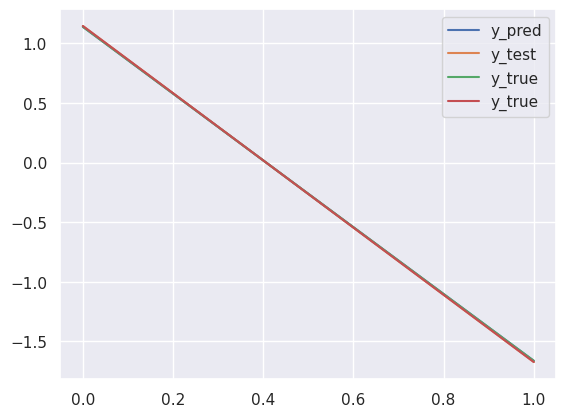

In [62]:
plt.plot(y_pred,label = 'y_pred')
plt.plot(y_test,label = 'y_test')
plt.plot(y_true,label = 'y_true')
plt.legend()

#### (b) Plot loss curve for 1000 epochs

Text(0, 0.5, 'Loss')

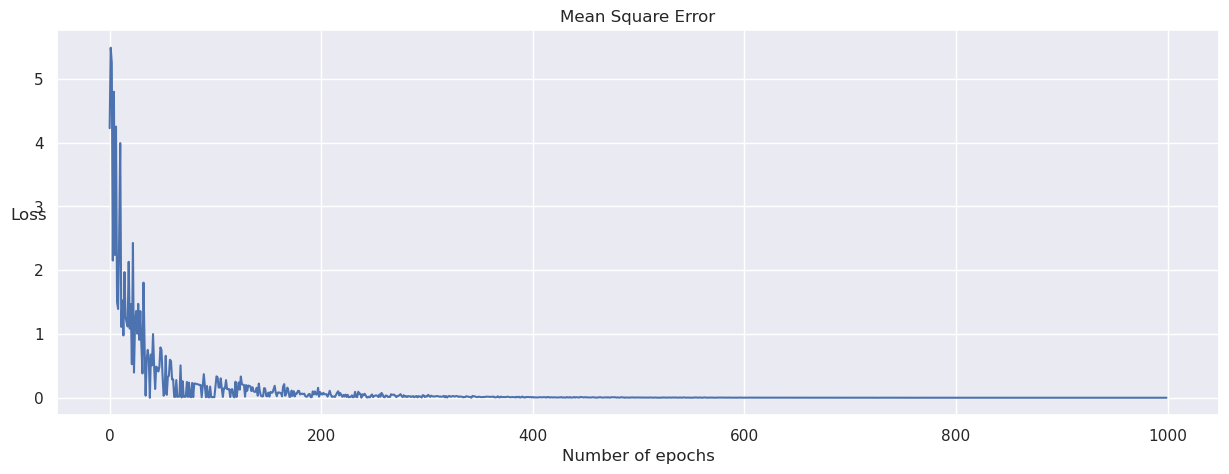

In [63]:
# Plotting the loss function
plt.figure(figsize=(15,5))
plt.plot(range(epochs),cost_history)
plt.title('Mean Square Error')
plt.xlabel('Number of epochs')
plt.ylabel('Loss',rotation = 0)

#### (c) Calculate MAE and RMSE of the model

In [64]:
def rmse(yHAT,y):
    rmse = np.sqrt(np.sum((yHAT-y)**2)/y.size)
    return rmse


def MAE(yHAT,y):
    return np.sum(np.absolute(yHAT-y))/y.size

print("MAE is ",MAE(y_pred,y_true))
print("RMSE is ",rmse(y_pred,y_true))

MAE is  0.004326822533398944
RMSE is  0.006247146353300709


### (ii) Squared Epsilon Hinge Loss

In [65]:
# cost function implimentation
def cal_cost(theta,x,y,epsilon = 0.1):
    y_pred = np.dot(x,theta)
    J = np.maximum(0.0, (y_pred - y) ** 2 - epsilon ** 2)
    
    return J

# SGDA Algorithms
def stochastic_gradient_descent(x,y,theta,lr,epochs):
    m = len(y_train)
    theta_history = np.zeros((epochs,3))
    cost_history = np.zeros((epochs))
    for i in range(epochs):
        cost_per_iteration = 0.0
        for j in range(m):

            l = int(np.random.randint(m))
            x_in = x_train[l].reshape(1,-1)
            x_inner = np.c_[np.ones((len(x_in),1)),x_in]
            y_inner = y_train[l].reshape(1,1)
            # Forward Propagation
            y_pred = np.dot(x_inner,theta)
            # computing the cost value
            cost_per_iteration = cost_per_iteration + cal_cost(theta,x_inner,y_inner)
            # backpropagation
            d_theta = (2/len(y_train))*(x_inner.T.dot((y_pred - y_inner)))
            # weight update
            theta = theta - (lr*d_theta)
        cost_history[i] = cost_per_iteration
    return theta,cost_history,theta_history


# Calling Stochastic gradient descent 
import time
lr  = 0.01
epochs = 1000
theta = np.random.randn(3,1)
print("Initial values of weights")
print(theta)

x_b = np.c_[np.ones((len(x_train),1)),x_train]

# Calling SGD
t20 = time.time()
theta,cost_history,theta_history = stochastic_gradient_descent(x_b,y_train,theta,lr,epochs)
t21 = time.time()
time_SGD = t21 - t20
print("Processing Time of SGD Algorithm")
print(time_SGD)
print(theta)


x_b1 = np.c_[np.ones((len(x_test),1)),x_test]
# Predict value by NN
y_pred = np.dot(x_b1,theta)
print("Optimal value of weights")
print('{:<10}{:.3}'.format('Theta0',theta[0][0]))
print('{:<10}{:.3}'.format('Theta1',theta[1][0]))
print('{:<10}{:.3}'.format('Theta2',theta[2][0]))
print("Minimum value of cost function")
print('{:<10}{:.3}'.format('Cost/MSE',cost_history[-1]))

# print(y_predicted)
y_true = np.c_[y_pred,y_test]


Initial values of weights
[[ 0.82810661]
 [-0.89043446]
 [-0.96294414]]
Processing Time of SGD Algorithm
0.15056848526000977
[[ 1.00142771e-03]
 [ 3.06417503e-01]
 [-1.04200266e+00]]
Optimal value of weights
Theta0    0.001
Theta1    0.306
Theta2    -1.04
Minimum value of cost function
Cost/MSE  0.0


#### (b) Plot loss curve for 100 epochs

Text(0, 0.5, 'Loss')

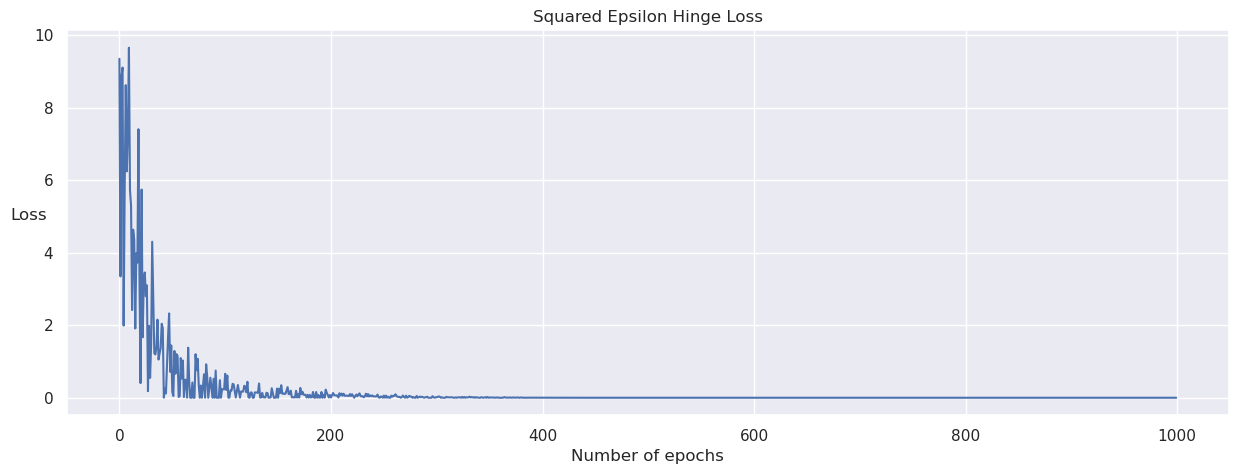

In [66]:
# Plotting the loss function
plt.figure(figsize=(15,5))
plt.plot(range(epochs),cost_history)
plt.title('Squared Epsilon Hinge Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss',rotation = 0)

#### (c) Calculate MAE and RMSE of the model

In [67]:
def rmse(yHAT,y):
    rmse = np.sqrt(np.sum((yHAT-y)**2)/y.size)
    return rmse


def MAE(yHAT,y):
    return np.sum(np.absolute(yHAT-y))/y.size

print("MAE is ",MAE(y_pred,y_true))
print("RMSE is ",rmse(y_pred,y_true))

MAE is  0.006262668736175314
RMSE is  0.009062196598765152
